# Tossing Percentage #
## Project by Sam Busser ##

### The stat that I created is called tossing percentage. It is similar to slugging percentage, but for pitchers. It takes into account the types of hits pitchers give up (weighted the same as slugging percentage), as well as strikeouts and earned runs. For a more detailed explanation, see the README here: https://github.com/SamBusser30/Sabermetrics-Final-Project- ###

### To begin, run the below cell to import everything we need ###


In [73]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats
from IPython.display import display, HTML

tossing_percentage = pd.read_csv('C:\\Users\\Sam\\Documents\\Sabermetrics\\Final Project\\Sabermetrics-Final-Project-\\tossing_percentage_results.csv')
tossing_with_era = pd.read_csv('C:\\Users\\Sam\\Documents\\Sabermetrics\\Final Project\\Sabermetrics-Final-Project-\\tossing_with_era.csv')
stats = pd.read_csv("C:\\Users\\Sam\\Documents\\Sabermetrics\\Final Project\\Sabermetrics-Final-Project-\\tossing_stats.csv")
stats = stats.drop(['pit_id'], axis=1)

### Run the below cell to see the table of the top pitchers according to tossing percentage 
### Note: the minimum number of batters faced to be considered for this stat is 1000


In [74]:
tossing_percentage

,first,last,Tossing_Percentage
0,Carlos,Marmol,0.13068
1,Clayton,Kershaw,0.15888
2,David,Robertson,0.16516
3,Yu,Darvish,0.19626
4,Stephen,Strasburg,0.19828
5,Tyler,Clippard,0.22752
6,Grant,Balfour,0.23397
7,Joaquin,Benoit,0.23840
8,Chris,Sale,0.25496
9,John,Axford,0.25650


#### As you can see, some of the big name pitchers are certainly in the top 10 (rembember this data is from 2010-2013). However, there are a few pitchers in the top 30 that seem out of place. In the following cells, we will do a little more investigation and comparisons. 

### First, lets compare the tossing percentage to another common place stat used to measure pitchers: ERA. 
### Run the below cell to see the same table from above but with each pitcher's ERA during the time period as well

In [75]:
tossing_with_era

,first,last,Tossing_Percentage,era
0,Carlos,Marmol,0.13068,4.0282
1,Clayton,Kershaw,0.15888,2.3639
2,David,Robertson,0.16516,3.7629
3,Yu,Darvish,0.19626,3.1425
4,Stephen,Strasburg,0.19828,3.0068
5,Tyler,Clippard,0.22752,3.7324
6,Grant,Balfour,0.23397,3.1429
7,Joaquin,Benoit,0.23840,3.7016
8,Chris,Sale,0.25496,2.8828
9,John,Axford,0.25650,3.7196


The ERA at the top seems to be a bit mixed, but it is promising to see that most of the ERAs at the bottom of the table are quite high. 

#### To get an idea of how ERA and tossing percentage relate to one another, lets plot the two in a scatter plot. Run the below cell to do so. 

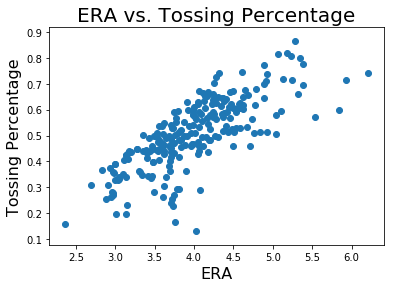

In [76]:
x = tossing_with_era['era']
y = tossing_with_era['Tossing_Percentage']
fig, ax = plt.subplots()
plt.xlabel("ERA", size = 16)
plt.ylabel("Tossing Percentage", size = 16)
plt.title("ERA vs. Tossing Percentage", size=20)

scatter = ax.scatter(x,y)
plt.show()

It definitely looks like there is a correlation here! Just to confirm, lets draw a line of best fit. Run the below cell to do that. Also note that the $r^2$ value will be below the graph 

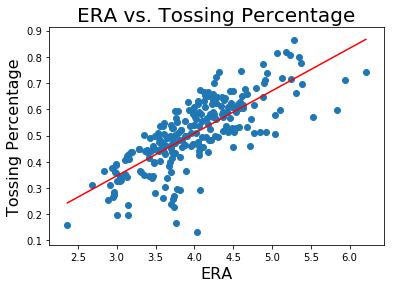

R_squared value: 0.761086114161


In [77]:
x = tossing_with_era['era']
y = tossing_with_era['Tossing_Percentage']
fig, ax = plt.subplots()
plt.plot(np.unique(x), np.poly1d(np.polyfit(x, y, 1))(np.unique(x)), color='red')

plt.xlabel("ERA", size = 16)
plt.ylabel("Tossing Percentage", size = 16)
plt.title("ERA vs. Tossing Percentage", size=20)

scatter = ax.scatter(x,y)
plt.show()
slope, intercept, r_value, p_value, std_err = scipy.stats.linregress(x, y)
print("R_squared value:",r_value)

As we expected, there is a very strong correlation between ERA and tossing percentage. This makes sense, as earned runs were considered in the calculation of tossing percentage. However, those earned runs were not standardized like they are in ERA, so it is good to see a correlation here. ERA is definitely one of the most important stats considered when determining the ability/effectiveness of a pitcher in todays game, so tossing percentage's correlation with ERA gives it validity. 

### The last part of this presentation will be finding the tossing percentage for a pitcher of your choosing. In the cell below, enter the first name and last name of the pitcher you want to see in the corresponding variables between the quotation marks. Then run the next cell. 
#### You will see that pitcher's tossing percentage and ERA, as well as all of his stats that went into calculating tossing percentage. Finally, you will see that pitcher's data point highlighted on the scatter plot we saw earlier.

In [82]:
first_name = "Jeff"#Enter name here
last_name = "Francis"#Enter name here

,first,last,Tossing_Percentage,era
226,Jeff,Francis,0.73889,4.929


,first,last,1b,2b,3b,hr,k,er,batters_faced
68,Jeff,Francis,386,121,13,57,297,270,2070


The league average ERA is: 3.98800506329
The league average tossing percentage is: 0.506568860759


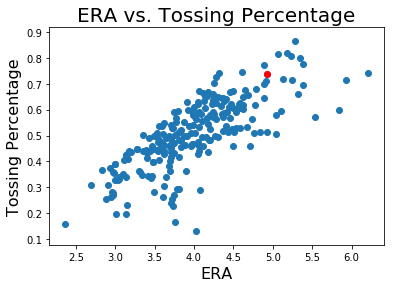

In [83]:
league_era_avg = (tossing_with_era['era'].sum()) / (tossing_with_era['era'].count())
leage_tossing_avg = (tossing_with_era['Tossing_Percentage'].sum()) / (tossing_with_era['Tossing_Percentage'].count())
flag = 0

for index, row in tossing_with_era.iterrows():
    if row['first'] == first_name and row['last'] == last_name:
        individual_era = row['era']
        indivdual_tossing = row['Tossing_Percentage']
        stat_temp = tossing_with_era.loc[tossing_with_era['first'] == first_name]
        stat_temp = stat_temp.loc[stat_temp['last'] == last_name]
        display(stat_temp)
        flag = 1
        break
        
for index, row in stats.iterrows():
    if row['first'] == first_name and row['last'] == last_name:
        stat_temp = stats.loc[stats['first'] == first_name]
        stat_temp = stat_temp.loc[stat_temp['last'] == last_name]
        display(stat_temp)


if flag == 0: 
    print("Sorry, could not find that pitcher in the database, please try again.")
    print("Rember, this data is from 2010 to 2013, and there is a minimum of 1000 batters faced.")

    
else:
    print("The league average ERA is:", league_era_avg)
    print("The league average tossing percentage is:", leage_tossing_avg)

    x = tossing_with_era['era']
    y = tossing_with_era['Tossing_Percentage']
    fig, ax = plt.subplots()
    plt.xlabel("ERA", size = 16)
    plt.ylabel("Tossing Percentage", size = 16)
    plt.title("ERA vs. Tossing Percentage", size=20)

    scatter = ax.scatter(x,y)
    ax.scatter(individual_era, indivdual_tossing, color='red')
    plt.show()



## Thank you for taking the time to look at my project. I hope you enjoyed it! 